In [1]:
import pandas as pd

emb = pd.read_csv('../data/emb/from_adelle/emb_p_19.0_q_8.483911078685804_g_2.tsv', index_col=0,sep='\t')
samples = emb[emb.index.str.startswith('MD')]
features = emb[~emb.index.str.startswith('MD')]

In [2]:
import pickle

with open('../results/models/time_19.0_8.483911078685804_2.pkl', 'rb') as f:
    time_clf = pickle.load(f)

preds = time_clf.predict_proba(features)
preds = pd.DataFrame(preds, index=features.index, columns=['baseline', 'endpoint'])
#preds.to_csv('../results/models/time_19.0_8.483911078685804_2_preds.tsv', sep='\t')


sample_preds = time_clf.predict_proba(samples)
sample_preds = pd.DataFrame(sample_preds, index=samples.index, columns=['baseline', 'endpoint'])

/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


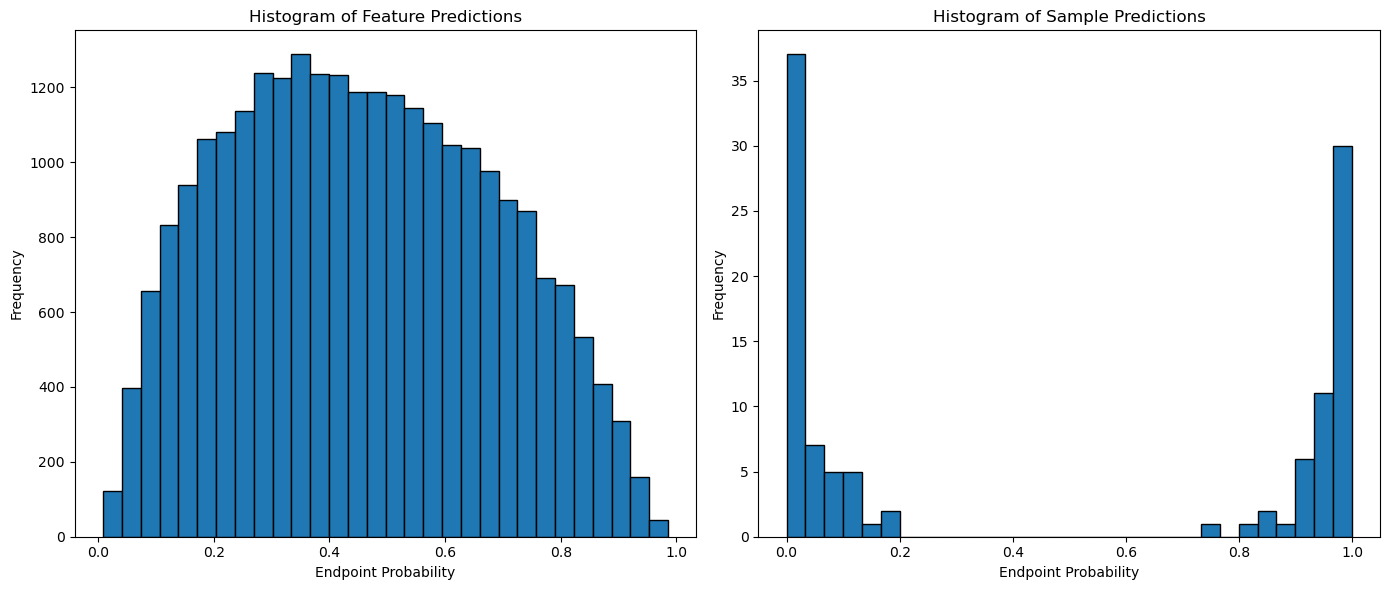

In [6]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram of the 'endpoint' column in preds
axes[0].hist(preds['endpoint'], bins=30, edgecolor='k')
axes[0].set_xlabel('Endpoint Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Feature Predictions')

# Histogram of the 'endpoint' column in sample_preds
axes[1].hist(sample_preds['endpoint'], bins=30, edgecolor='k')
axes[1].set_xlabel('Endpoint Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Sample Predictions')

# Adjust layout
plt.tight_layout()
plt.show()

In [4]:
filtered_preds = preds[(preds['endpoint'] <= 0.2) | (preds['endpoint'] >= 0.8)]
print(filtered_preds)


                                                    baseline  endpoint
N_AQ.10                                             0.933126  0.066874
N_AQ.1000                                           0.934994  0.065006
N_AQ.1005                                           0.177224  0.822776
N_AQ.1011                                           0.903286  0.096714
N_AQ.1017                                           0.824340  0.175660
...                                                      ...       ...
k_Bacteria.p_Firmicutes.c_Clostridia.o_Eubacter...  0.187724  0.812276
k_Bacteria.p_Bacteroidetes.c_Bacteroidia.o_Bact...  0.139299  0.860701
k_Bacteria.p_Bacteroidetes.c_Flavobacteriia.o_F...  0.184119  0.815881
k_Bacteria.p_Firmicutes.c_Clostridia.o_Eubacter...  0.184551  0.815449
k_Bacteria.p_Proteobacteria.c_Alphaproteobacter...  0.187898  0.812102

[5766 rows x 2 columns]


In [5]:
filtered_preds['prediction'] = filtered_preds[['baseline', 'endpoint']].idxmax(axis=1)
filtered_preds = filtered_preds.drop(columns=['baseline', 'endpoint'])
#filtered_preds.to_csv('../results/models/time_19.0_8.483911078685804_2_filtered_preds.tsv', sep='\t')
print(filtered_preds)

                                                   prediction
N_AQ.10                                              baseline
N_AQ.1000                                            baseline
N_AQ.1005                                            endpoint
N_AQ.1011                                            baseline
N_AQ.1017                                            baseline
...                                                       ...
k_Bacteria.p_Firmicutes.c_Clostridia.o_Eubacter...   endpoint
k_Bacteria.p_Bacteroidetes.c_Bacteroidia.o_Bact...   endpoint
k_Bacteria.p_Bacteroidetes.c_Flavobacteriia.o_F...   endpoint
k_Bacteria.p_Firmicutes.c_Clostridia.o_Eubacter...   endpoint
k_Bacteria.p_Proteobacteria.c_Alphaproteobacter...   endpoint

[5766 rows x 1 columns]


/tmp/ipykernel_2470908/3673061907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_preds['prediction'] = filtered_preds[['baseline', 'endpoint']].idxmax(axis=1)


/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/mnt/home/f0106093/anaconda3/envs/multiomics/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


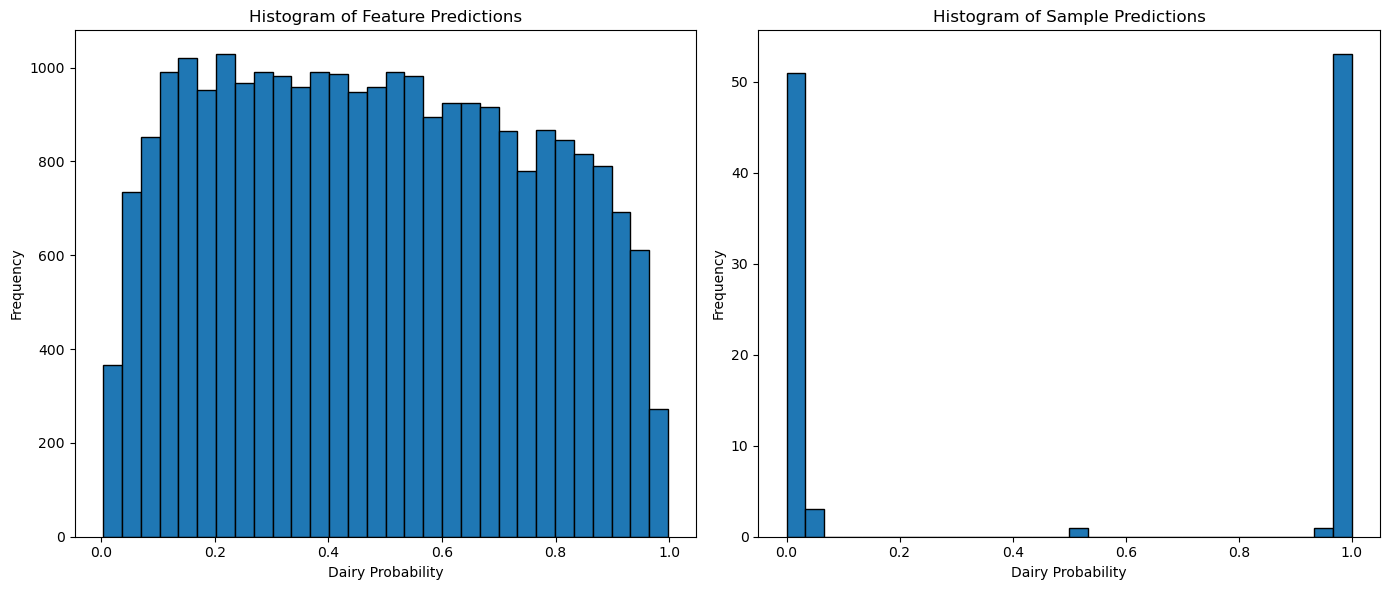

In [3]:
import pickle
import matplotlib.pyplot as plt


with open('../results/models/time_19.0_8.483911078685804_2.pkl', 'rb') as f:
    time_clf = pickle.load(f)

preds = time_clf.predict_proba(features)
preds = pd.DataFrame(preds, index=features.index, columns=['dairy', 'meat'])
preds.to_csv('../results/models/diet_19.0_8.483911078685804_2_preds.tsv', sep='\t')


sample_preds = time_clf.predict_proba(samples)
sample_preds = pd.DataFrame(sample_preds, index=samples.index, columns=['dairy', 'meat'])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram of the 'endpoint' column in preds
axes[0].hist(preds['dairy'], bins=30, edgecolor='k')
axes[0].set_xlabel('Dairy Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Feature Predictions')

# Histogram of the 'endpoint' column in sample_preds
axes[1].hist(sample_preds['dairy'], bins=30, edgecolor='k')
axes[1].set_xlabel('Dairy Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Sample Predictions')

# Adjust layout
plt.tight_layout()
plt.show()

